# Réduction Active du Bruit avec la Transformée de Fourier
Ce projet vise à réduire le bruit ambiant capté par un microphone en générant un signal inverse (anti-bruit) à partir de la transformée de Fourier. L'objectif est de créer une interférence destructive entre le bruit et le signal inverse pour minimiser les nuisances sonores.


## Importation des bibliothèques
Nous allons utiliser les bibliothèques suivantes :
- `numpy` : pour la manipulation de tableaux numériques et le calcul de la transformée de Fourier.
- `sounddevice` : pour enregistrer et jouer des signaux audio.
- `matplotlib` : pour tracer les courbes temporelles et fréquentielles.

In [1]:
import numpy as np
import sounddevice as sd
from scipy.fft import fft, ifft
import matplotlib.pyplot as plt

## Capture du signal audio
Nous allons enregistrer un signal sonore à l'aide du microphone intégré. Ce signal sera capturé sur une durée de 5 secondes et échantillonné à 44,1 kHz. Cette fréquence d'échantillonnage est standard pour l'audio.


In [32]:
# Paramètres d'enregistrement
duration = 5  # Durée d'enregistrement en secondes
sample_rate = 44100  # Fréquence d'échantillonnage

# Capture du signal audio à partir du microphone
print("Capture du signal...")
signal = sd.rec(int(duration * sample_rate), samplerate=sample_rate, channels=1)
sd.wait()  # Attendre la fin de l'enregistrement

# Aplatir le signal capturé pour obtenir un tableau 1D
signal = signal.flatten()

Capture du signal...


## Transformée de Fourier (FFT)
Nous allons appliquer la transformée de Fourier sur le signal capturé pour obtenir son spectre fréquentiel. Cela permet de visualiser les fréquences dominantes présentes dans le signal sonore (voix humaine ou bruit ambiant).


In [33]:
# Application de la FFT
freq_domain = fft(signal)

# Calcul des fréquences associées à la FFT
freqs = np.fft.fftfreq(len(signal), 1/sample_rate)
mask = freqs > 0  # Nous n'affichons que les fréquences positives

## Inversion du signal (anti-bruit)
Pour générer le signal inverse, nous allons simplement inverser la phase des composantes fréquentielles. Cela produira un signal en opposition de phase, prêt à interférer destructivement avec le bruit capté.


In [34]:
# Inversion de la phase du spectre
freq_inverse = -freq_domain

# Retour dans le domaine temporel avec la FFT inverse
signal_inverse = ifft(freq_inverse).real

## Visualisation des signaux temporels
Nous allons tracer les signaux dans le domaine temporel pour voir l'onde captée, l'onde inversée (anti-bruit), et la somme des deux (qui devrait montrer une réduction de l'amplitude).

Les courbes tracées representent ma voix capturée en disant "Bonjour à tous"


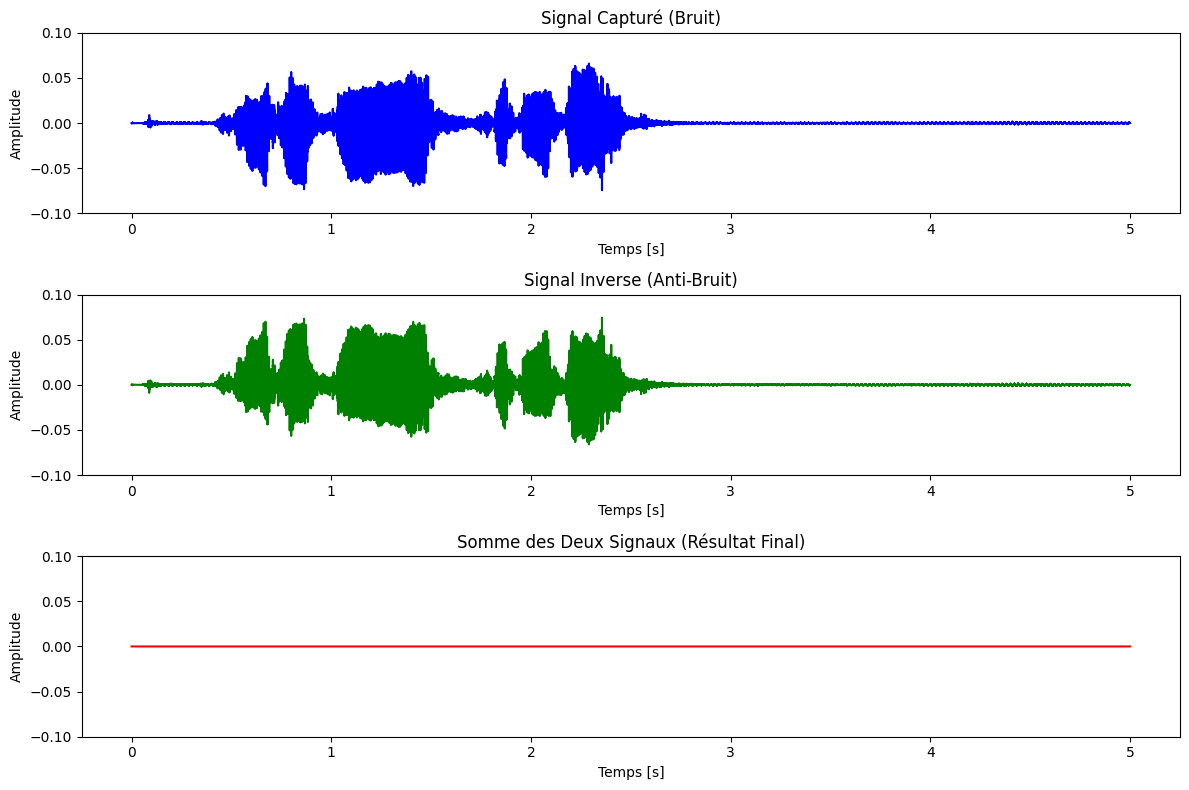

In [35]:
# Création de l'échelle de temps
time = np.linspace(0, duration, int(sample_rate * duration))

# Calcul de la somme des deux signaux (bruit + anti-bruit)
signal_sum = signal + signal_inverse

# Tracer les courbes temporelles
plt.figure(figsize=(12, 8))

# Signal capturé
plt.subplot(3, 1, 1)
plt.plot(time, signal, color='blue')
plt.title('Signal Capturé (Bruit)')
plt.xlabel('Temps [s]')
plt.ylabel('Amplitude')
plt.ylim([-.1,.1])

# Signal inverse
plt.subplot(3, 1, 2)
plt.plot(time, signal_inverse, color='green')
plt.title('Signal Inverse (Anti-Bruit)')
plt.xlabel('Temps [s]')
plt.ylabel('Amplitude')
plt.ylim([-.1,.1])

# Somme des deux signaux
plt.subplot(3, 1, 3)
plt.plot(time, signal_sum, color='red')
plt.title('Somme des Deux Signaux (Résultat Final)')
plt.xlabel('Temps [s]')
plt.ylabel('Amplitude')
plt.ylim([-.1,.1])

plt.tight_layout()
plt.show()

## Visualisation des spectres de fréquence
Nous allons maintenant tracer les spectres de fréquence des trois signaux (capturé, inverse et somme) pour voir comment les fréquences dominantes sont affectées par l'anti-bruit.


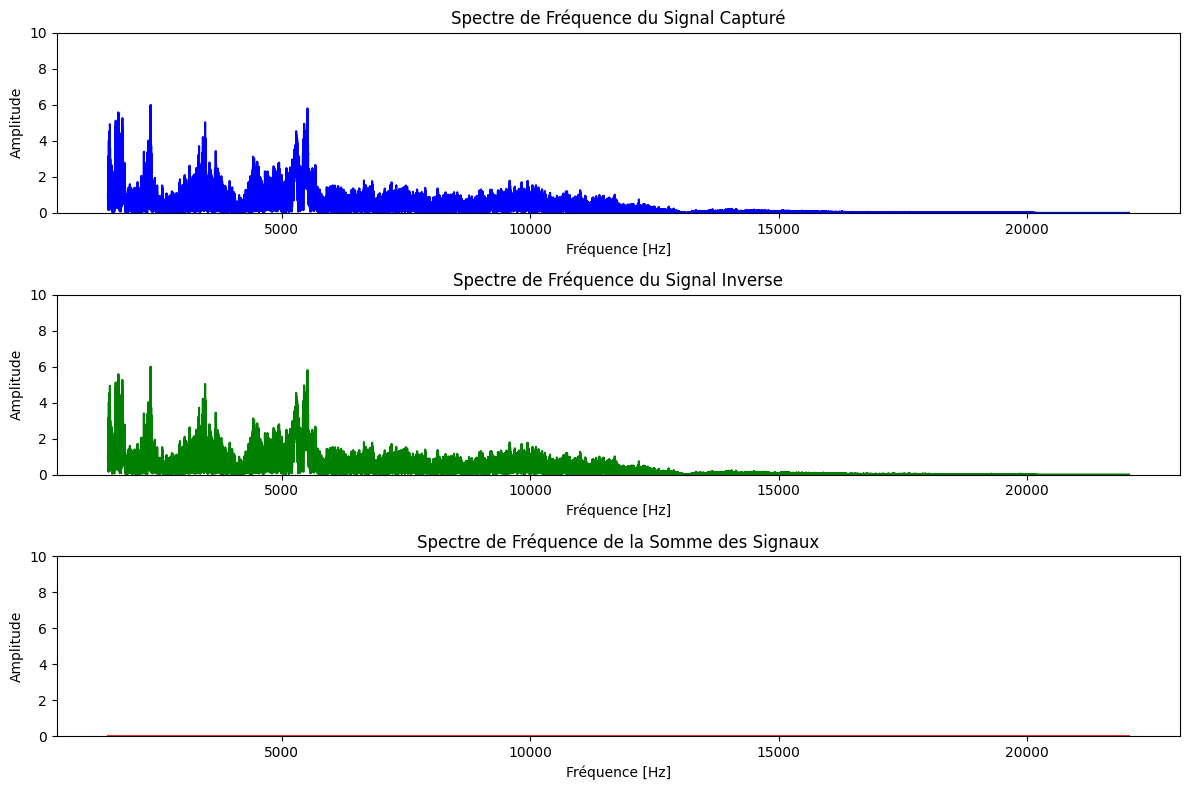

In [38]:
#appliquer un filtre passe-haut pour négliger les fréquence du au OFFSET 
mask = freqs > 1500

# Calcul de la magnitude des fréquences
magnitude_signal = np.abs(freq_domain)
magnitude_inverse = np.abs(freq_inverse)
magnitude_sum = np.abs(fft(signal_sum))

# Tracer les spectres de fréquence
plt.figure(figsize=(12, 8))

# Spectre du signal capturé
plt.subplot(3, 1, 1)
plt.plot(freqs[mask], magnitude_signal[mask], color='blue')
plt.title('Spectre de Fréquence du Signal Capturé')
plt.xlabel('Fréquence [Hz]')
plt.ylabel('Amplitude')
plt.ylim([0,10])

# Spectre du signal inverse
plt.subplot(3, 1, 2)
plt.plot(freqs[mask], magnitude_inverse[mask], color='green')
plt.title('Spectre de Fréquence du Signal Inverse')
plt.xlabel('Fréquence [Hz]')
plt.ylabel('Amplitude')
plt.ylim([0,10])

# Spectre de la somme
plt.subplot(3, 1, 3)
plt.plot(freqs[mask], magnitude_sum[mask], color='red')
plt.title('Spectre de Fréquence de la Somme des Signaux')
plt.xlabel('Fréquence [Hz]')
plt.ylabel('Amplitude')
plt.ylim([0,10])

plt.tight_layout()
plt.show()

117752